<a href="https://www.kaggle.com/code/imharshkashyap/spam-detection-using-python?scriptVersionId=149280633" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-emails/spam.csv
/kaggle/input/duplication/download.png
/kaggle/input/image-data/python_eat_email.jpeg


In [ ]:
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

# **Data Checks to perform**

In [6]:
df = pd.read_csv('/kaggle/input/spam-emails/spam.csv', encoding='latin-1')

In [7]:
# also view specifice number of row ex. for 10 row df.head(10)
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df.info()

In [11]:
#lets delete Unnamed : 2 , Unnamed : 3 and Unnamed : 4 column because they have null values in almost entire column.
#if wanted to delete columns with different name
#column_to_delete=[name for name in df.columns if name.startswith('Unnamed') or name.startwith('columName')]
coln_delete=[name for name in df.columns if name.startswith('Unnamed')]
df.drop(columns=coln_delete,inplace=True)

In [12]:
#to rename v1 column to target and v2 column to message
df.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

In [13]:
df.head()


,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#print null values
df.isnull().sum()

target     0
message    0
dtype: int64

In [15]:
df.describe()

,target,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


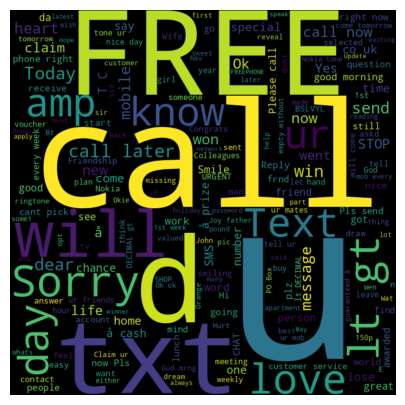

In [16]:
# lets create the word cloud of duplicaions in the spam emails
from wordcloud import WordCloud

# Get duplicate messages
duplicate_messages = df[df.duplicated(subset='message', keep=False)]['message']

# Concatenate duplicate messages into a single string
text = ' '.join(duplicate_messages)

# Create a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


# Save the word cloud as an image file
#plt.savefig('wordclouds.png')

# Close the plot
#plt.close()
plt.show()

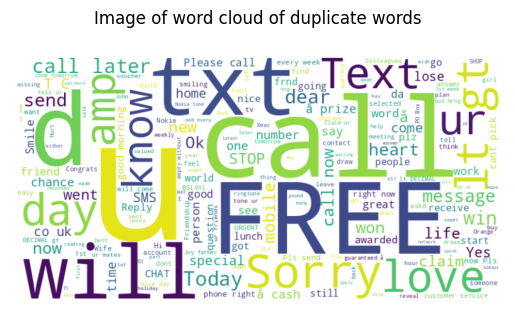

In [18]:
from PIL import Image

# Open the image file
image = Image.open('/kaggle/input/duplication/download.png')

# Display the image
plt.title("Image of word cloud of duplicate words", pad=20)
plt.imshow(image)
plt.axis('off')
plt.show()

In [19]:
#print no of duplicate records
print("Number of duplicate records:", df.duplicated().sum())

Number of duplicate records: 403


In [20]:
# Delete duplicate records based on all columns
df.drop_duplicates(inplace=True)

# Print the updated DataFrame
print(df)

     target                                            message
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5169 rows x 2 columns]


# **Data Preprocessing**

  1. target : map spam to 0 and ham/not-spam to 1
  2. message :   1. lower case
                 2. tokenization
                 3. remove stop words and punctuation
                 4. stemizing : reduce the word to its root form.

In [21]:
#function to map target with 0 and 1
def target_mapper(text):
    return 0 if text=='spam' else 1
df["target"]=df['target'].apply(func=target_mapper)

In [22]:
#import nltk library for data preprocessing
import nltk
nltk.download('punkt') #download punctuation
nltk.download('stopwords') #download stopwords
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk import tokenize  #import nltk tokenize package to use word and sentence tokenizer.

STOPWORDS=stopwords.words("english") #taking only english stopwords because spam messages are in english language only.

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#function to preprocess row text into ready to use format for our model.
def message_tranformation(text):
    text=text.strip() #remove black spaces from starting and ending of message text
    text=text.lower() #coverting all message words into lowercase format to generalize it.

    #tokenize the text
    words=tokenize.word_tokenize(text)

    #intialize the porter stemmer
    stemmer=PorterStemmer()

    #remove stopwords and applying stemming while ignoring special words.
    filtered_words=[stemmer.stem(word) for word in words if word not in STOPWORDS and word.isalnum()]

    #Join list of filter words back to the string format
    transformed_text=" ".join(filtered_words)
    return transformed_text

In [24]:
#applying message tranformation function on email_df transformed_message column.
df["altered_message"]=df["message"].apply(message_tranformation)

In [25]:
df.head()

,target,message,altered_message
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point avail bugi n great world la e ...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [26]:
#now we can delete message column because we are going to work with preprocessed text messages only.
df.drop(columns="message",inplace=True)

In [27]:
import plotly.express as px
import pandas as pd

# Assuming you have a DataFrame called df with a column named "altered_message" containing the text data
spam_messages = df[df["target"] == 0]["altered_message"].str.cat(sep=" ")

# Create a DataFrame with word frequencies
word_freq = pd.Series(spam_messages.split()).value_counts().reset_index()
word_freq.columns = ['word', 'frequency']

# Create the word cloud plot using Plotly
fig = px.scatter(word_freq, x='word', y='frequency', size='frequency', color='frequency',
                 hover_data=['word', 'frequency'], title='Word Cloud for Spam Category Messages')

fig.update_layout(xaxis={'categoryorder': 'total descending'})

fig.show()


In [28]:
#configure object of wordcloud plot
wc=WordCloud(width=800,height=800,min_font_size=8,background_color='white')

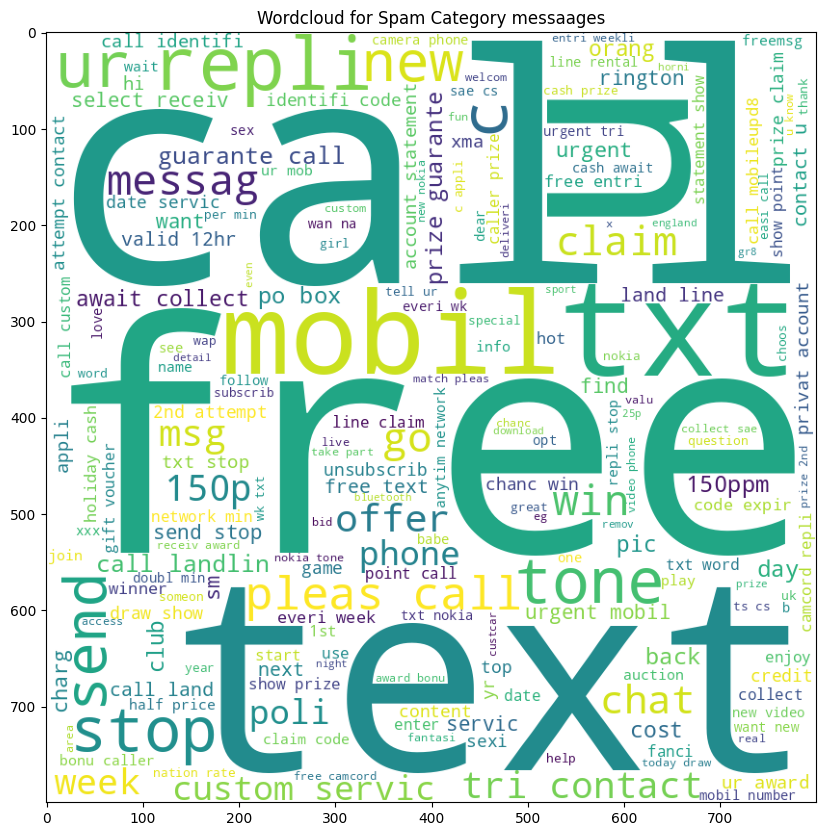

In [29]:
#generate wordcloud plot for spam messages
spam_wc=wc.generate(df[df["target"]==0]["altered_message"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.title("Wordcloud for Spam Category messaages")
plt.show()

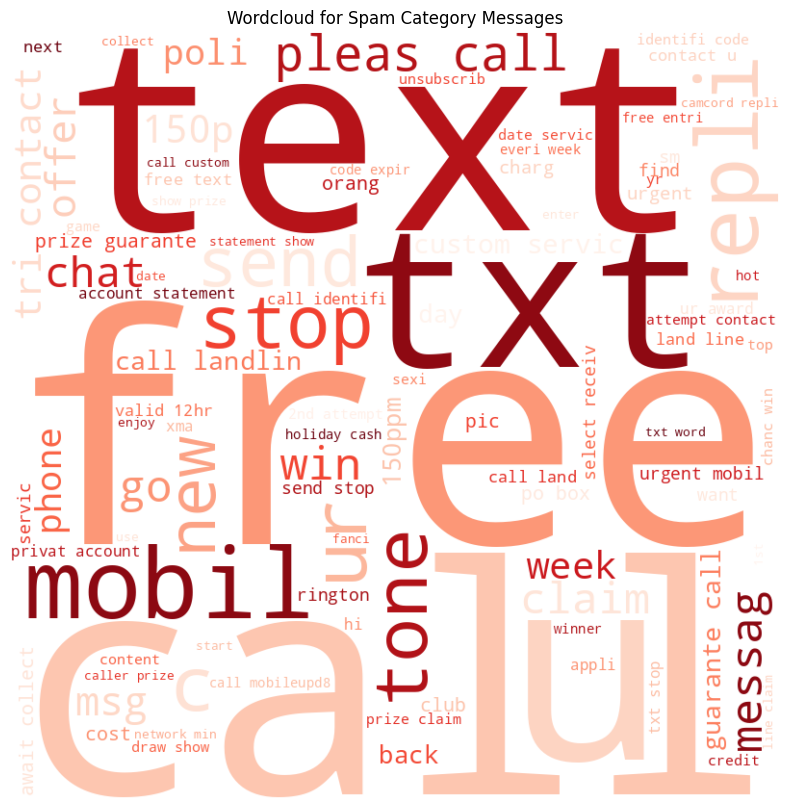

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

spam_messages = df[df["target"] == 0]["altered_message"].str.cat(sep=" ")

spam_wc = WordCloud(background_color="white", width=800, height=800, max_words=100, colormap="Reds").generate(spam_messages)

plt.figure(figsize=(12, 10))
plt.imshow(spam_wc, interpolation="bilinear")
plt.title("Wordcloud for Spam Category Messages")
plt.axis("off")
plt.show()


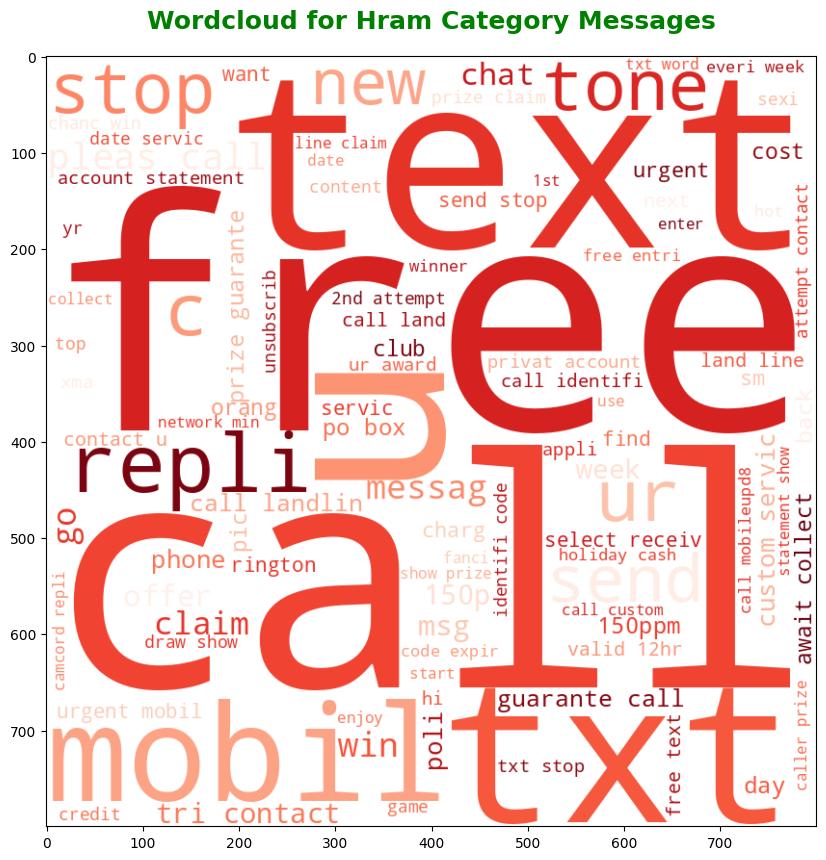

In [31]:
# Customize the title and display the word cloud
ham_messages = df[df["target"] == 0]["altered_message"].str.cat(sep=" ")
ham_wc = WordCloud(background_color="white", width=800, height=800, max_words=100, colormap="Reds").generate(ham_messages)
plt.figure(figsize=(20, 10))
plt.imshow(ham_wc, interpolation='bilinear')
plt.title("Wordcloud for Hram Category Messages", fontdict={'fontsize': 18, 'fontweight': 'bold', 'color': 'green'}, pad=20)
plt.show()

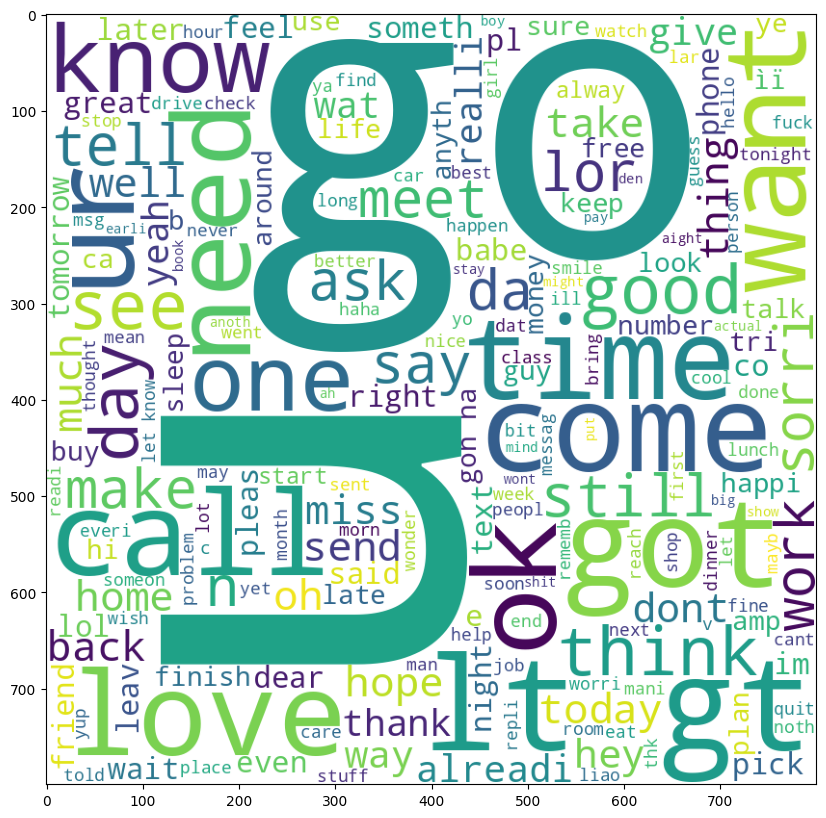

In [32]:
#generate wordcloud plot for not-spam messages
ham_wc=wc.generate(df[df["target"]==1]["altered_message"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(ham_wc)
plt.show()

In [33]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import plotly.colors as colors

# Assuming you have a DataFrame called word_freq with columns 'word' and 'frequency'

# Generate random angles for circular layout
np.random.seed(0)
angles = np.random.rand(len(word_freq)) * 2 * np.pi

# Map the frequency values to a color scale
color_scale = colors.sequential.Viridis
normalized_freq = (word_freq['frequency'] - word_freq['frequency'].min()) / (word_freq['frequency'].max() - word_freq['frequency'].min())
colors_mapped = colors.sample_colorscale(color_scale, normalized_freq)

# Create the word cloud plot using Plotly
fig = go.Figure(data=go.Scatterpolar(
    r=word_freq['frequency'],
    theta=angles,
    mode='text',
    text=word_freq['word'],
    textfont=dict(size=word_freq['frequency'], color=colors_mapped),
    hoverinfo='text',
    hovertext=word_freq['word'],
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=False),
        angularaxis=dict(visible=False)
    ),
    showlegend=False,
    title='Word Cloud for Spam Category Messages',
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()


In [34]:
#used words in spam messages
spam_corpus=list()
for msg in df[df['target']==0]["altered_message"].to_list():
    for word in msg.split():
        spam_corpus.append(word)

In [35]:
len(spam_corpus)

9883

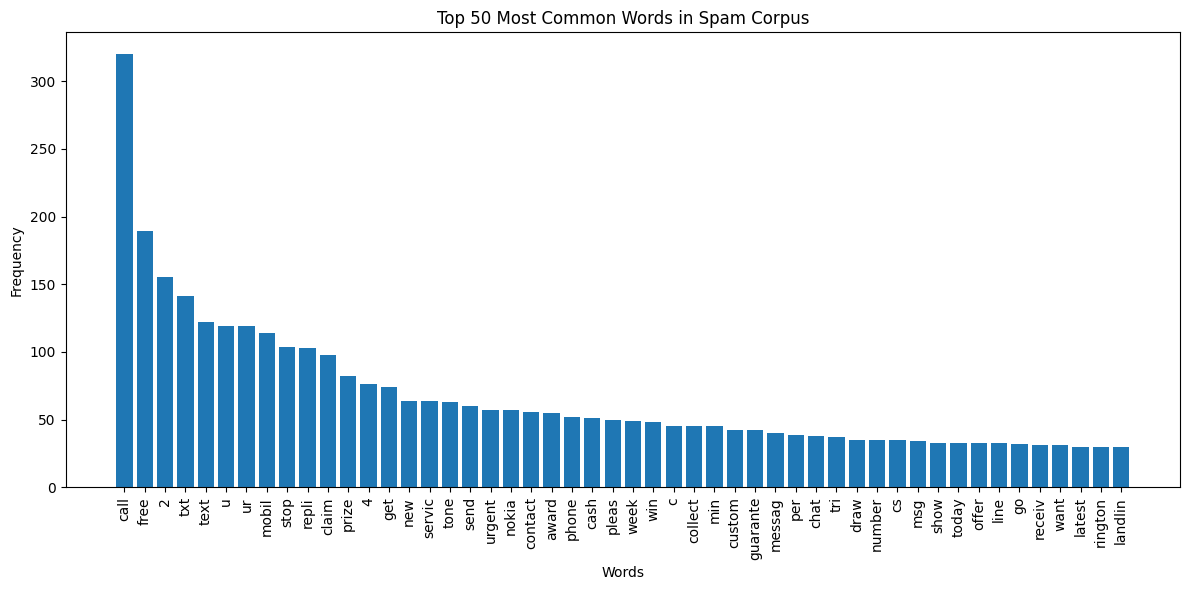

In [36]:
# Create a Counter object to count the occurrences of each word in the spam corpus
from collections import Counter

swc = Counter(spam_corpus)

# Get the top 50 most common words and store them in a DataFrame
spam_top50_common_words = pd.DataFrame(swc.most_common(50))

# Plot the top 50 common words using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(spam_top50_common_words[0], spam_top50_common_words[1])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Most Common Words in Spam Corpus')
plt.tight_layout()
plt.show()


In [38]:
import plotly.express as px

# Create a Counter object to count the occurrences of each word in the spam corpus
swc = Counter(spam_corpus)

# Get the top 50 most common words and store them in a DataFrame
spam_top50_common_words = pd.DataFrame(swc.most_common(50), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
spam_top50_common_words.sort_values(by='Frequency', ascending=False, inplace=True)

# Assign a color to each word based on its frequency
colors = px.colors.sequential.Blues[:50]

# Create the tree map using Plotly
fig = px.treemap(spam_top50_common_words, path=['Word'], values='Frequency', color='Frequency', color_continuous_scale=colors)

# Customize the layout
fig.update_layout(title='Top 50 Most Common Words in Spam Corpus (Tree Map)',
                  uniformtext=dict(minsize=10, mode='hide'))

# Show the tree map
fig.show()


In [39]:
#print the most common 50 words from the spam category messages
from collections import Counter
spam_top_50_common_words=pd.DataFrame(Counter(spam_corpus).most_common(50))
print(spam_top_50_common_words)

           0    1
0       call  320
1       free  189
2          2  155
3        txt  141
4       text  122
5          u  119
6         ur  119
7      mobil  114
8       stop  104
9      repli  103
10     claim   98
11     prize   82
12         4   76
13       get   74
14       new   64
15    servic   64
16      tone   63
17      send   60
18    urgent   57
19     nokia   57
20   contact   56
21     award   55
22     phone   52
23      cash   51
24     pleas   50
25      week   49
26       win   48
27         c   45
28   collect   45
29       min   45
30    custom   42
31  guarante   42
32    messag   40
33       per   39
34      chat   38
35       tri   37
36      draw   35
37    number   35
38        cs   35
39       msg   34
40      show   33
41     today   33
42     offer   33
43      line   33
44        go   32
45    receiv   31
46      want   31
47    latest   30
48   rington   30
49   landlin   30


# **Data Transformation**

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cVector = CountVectorizer() #CountVectorizer is used to convert text into numeric array
x = cVector.fit_transform(df["altered_message"]).toarray()

In [40]:
#seperating target column
y = df['target']

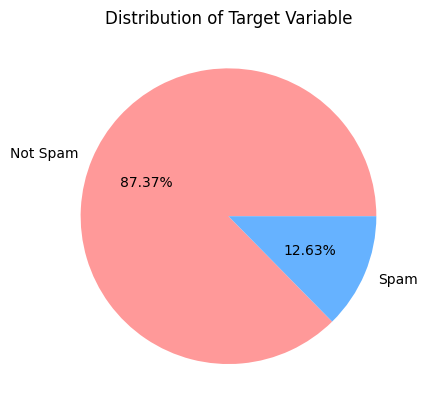

In [41]:
import matplotlib.pyplot as plt

# Get the value counts of the target variable
value_counts = y.value_counts()

# Define the colors for the pie chart
colors = ['#FF9999', '#66B2FF']

# Create the pie chart
plt.pie(value_counts.values, labels=["Not Spam", "Spam"], autopct="%0.2f%%", colors=colors)

# Add a title to the pie chart
plt.title("Distribution of Target Variable")

# Display the pie chart
plt.show()


# Spliting data into Training and Testing sets into 80/20 ratio

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((4135, 6629), (4135,), (1034, 6629), (1034,))

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

#function to evaluate the performance of model
def evaluate_model_performance(model,x_test,y_test):
    y_pred=model.predict(x_test)
    print("Accurary Score : {}".format(np.round(accuracy_score(y_test,y_pred)*100,decimals=2)))
    print("Precision Score : {}".format(np.round(precision_score(y_test,y_pred)*100,decimals=2)))
    print("Recall Score : {}".format(np.round(recall_score(y_test,y_pred)*100,decimals=2)))
    print("F1 Score : {}".format(np.round(f1_score(y_test,y_pred)*100,decimals=2)))
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt="d",annot=True,cmap="rainbow")
    plt.show()
    print("*Classification Report*********************************************")
    print(classification_report(y_test,y_pred))

In [46]:
#import models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

lr  :  94.4
nb  :  97.4
svm  :  89.2
knn  :  85.8
cart  :  91.0
rf  :  92.6
ad  :  93.8
gb  :  94.6
xgbc  :  94.2


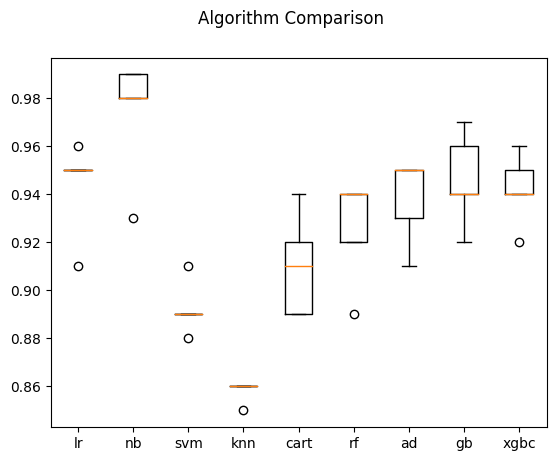

In [47]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

# Define models
models = {
    "lr":LogisticRegression(),
    "nb":MultinomialNB(),
    "svm":SVC(),
    "knn":KNeighborsClassifier(),
    "cart":DecisionTreeClassifier(),
    "rf":RandomForestClassifier(),
    "ad":AdaBoostClassifier(),
    "gb":GradientBoostingClassifier(),
    "xgbc":XGBClassifier()
}

# Define oversampler for dealing with imbalance
oversampler = RandomOverSampler()

# Define cross-validation strategy for imbalanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_scores=list()
# Loop through each model and evaluate its performance
for model_name, model in models.items():
    # Apply oversampling to training data
    X_resampled, y_resampled = oversampler.fit_resample(x, y)

    # Perform cross-validation
    scores = cross_val_score(model, X_resampled[:500], y_resampled[:500], cv=cv, scoring="f1_micro")
    print(model_name," : ",np.round(np.mean(scores)*100,decimals=2))
    model_scores.append(scores)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(model_scores)
ax.set_xticklabels(models.keys())
plt.show()

We conclude that by analysing the performance of all base models we can say naive bayes and GradientBoostingClassifier are best for our dataset so here i am going to consider naive bayes as final out of all models.

In [48]:
#training our final Multinomial Naive Bayes model
model=MultinomialNB()
model.fit(x_train,y_train)
print("Model Training score : ",model.score(x_train,y_train))

Model Training score :  0.992261185006046


Accurary Score : 97.58
Precision Score : 98.88
Recall Score : 98.32
F1 Score : 98.6


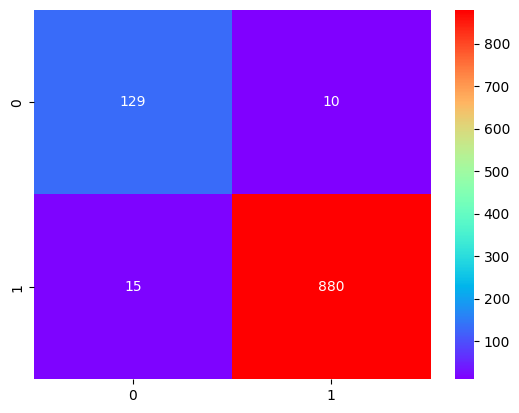

*Classification Report*********************************************
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       139
           1       0.99      0.98      0.99       895

    accuracy                           0.98      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034



In [49]:
#model performance
evaluate_model_performance(model,x_test,y_test)

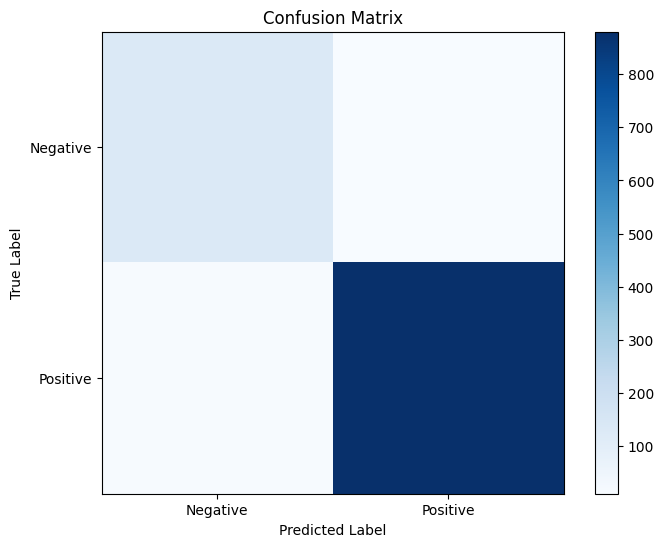

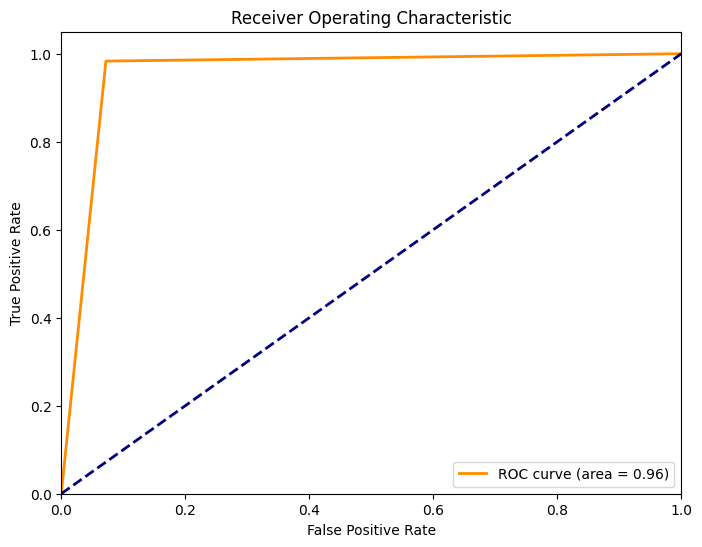

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

def evaluate_model_performance(model, x_test, y_test):
    # Make predictions
    y_pred = model.predict(x_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.yticks([0, 1], ['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Assuming you have a trained model and test data
evaluate_model_performance(model, x_test, y_test)
